<a href="https://colab.research.google.com/github/abhishruti/data_science_challenge/blob/main/challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre processing libraries
from imblearn.under_sampling import RandomUnderSampler

# splitting the dataset
from sklearn.model_selection import train_test_split

# Boosting Algorithm
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

# Evaluation metric
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Setting SEED to Reproduce Same Results
SEED=42

## Exploratory Data Analysis

In [ ]:
#loading the data

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Getting hold of training data first

In [ ]:
#shape of training and testing data
train.shape

(79853, 12)

In [ ]:
#printing the first five rows of train dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [ ]:
#printing the last five rows of train dataset
train.tail()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1
79852,71531,0.550,15709,280140,1.0,0.0,1.0,99.84,8,A,Urban,0


In [ ]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [ ]:
#looking for the missing values
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [ ]:
# checking for duplicate rows
train.duplicated().sum()

0

In [ ]:
#data types
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

Inferences from EDA:

1) no duplicated rows

2) missing values in Count_3-6_months_late, Count_more_than_12_months_late,application_underwriting_score - for which imputation needs to be done

3) sourcing_channel and residence_area_type are object data types means categorical data types - for which label encoding needs to be performed

## Feature Engineering

Label encoding

In [ ]:
#label encoding the residence_area_type column
train['residence_area_type']=train['residence_area_type'].replace({'Urban':1,'Rural':0})

#Label encoding the sourcing_channel column
sourcing_channel = pd.get_dummies(train["sourcing_channel"])
train = pd.concat([train, sourcing_channel], axis=1, join="inner")

Imputation

In [ ]:
# handling missing values

# replacing the missing values in application_underwriting_score with median value
train['application_underwriting_score'].fillna(train['application_underwriting_score'].median(), inplace=True)

# replacing the missing values in different months_late columns with mean
train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].mean(), inplace=True)
train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].mean(), inplace=True)
train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].mean(), inplace=True)

In [ ]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,A,B,C,D,E
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,1,1,0,0,1,0,0
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,1,1,1,0,0,0,0
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,0,0,0,0,1,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,1,1,1,0,0,0,0
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,1,1,0,1,0,0,0


Checking the skewness of individual data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


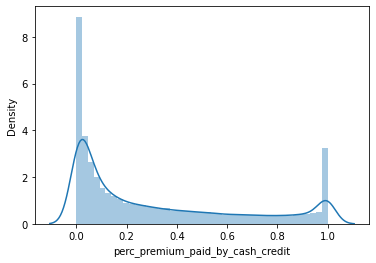

In [ ]:
sns.distplot(train['perc_premium_paid_by_cash_credit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


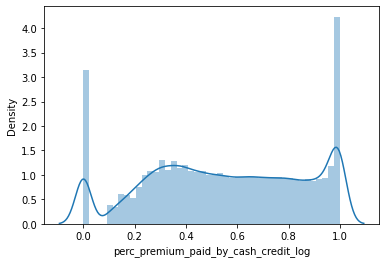

In [ ]:
train['perc_premium_paid_by_cash_credit_log'] = train['perc_premium_paid_by_cash_credit']**(1/3)
sns.distplot(train['perc_premium_paid_by_cash_credit_log'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


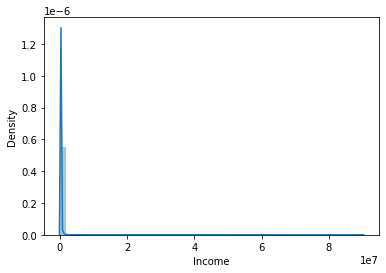

In [ ]:
sns.distplot(train['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


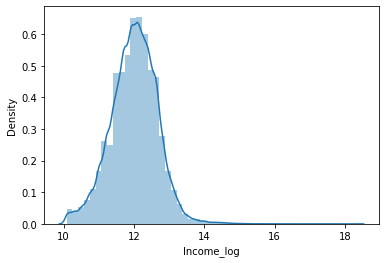

In [ ]:
train['Income_log'] = np.log(train['Income'])
sns.distplot(train['Income_log'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


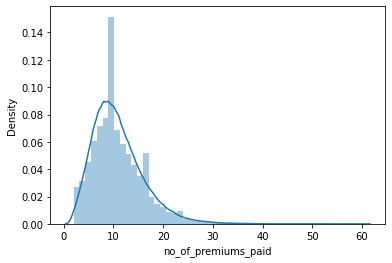

In [ ]:
sns.distplot(train['no_of_premiums_paid'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


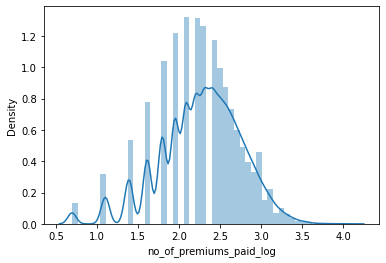

In [ ]:
train['no_of_premiums_paid_log'] = np.log(train['no_of_premiums_paid'])
sns.distplot(train['no_of_premiums_paid_log'])

Bivariate analysis

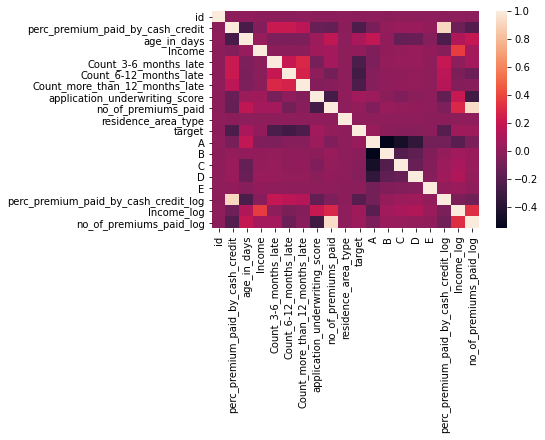

In [ ]:
# heatmap for visualizing the correlation
sns.heatmap(train.corr())

Inferences:

Id and residence_area_type doesn't contribute to predicting target variable

In [ ]:
#defining the feature and target variables

feature = train.drop(["id", "perc_premium_paid_by_cash_credit","Income", "residence_area_type", "sourcing_channel", "no_of_premiums_paid", "target"], axis=1)
target = train["target"]

In [ ]:
feature.columns

Index(['age_in_days', 'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score', 'A',
       'B', 'C', 'D', 'E', 'perc_premium_paid_by_cash_credit_log',
       'Income_log', 'no_of_premiums_paid_log'],
      dtype='object')

In [ ]:
feature.shape

(79853, 13)

In [ ]:
target.value_counts()

1    74855
0     4998
Name: target, dtype: int64

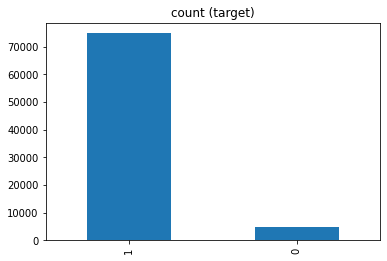

In [ ]:
# distribution of target variable
target.value_counts().plot(kind="bar", title="count (target)")

Handling imbalance in target variable

In [ ]:
X_resample, y_resample = RandomUnderSampler().fit_sample(feature, target)

X_resample.shape, y_resample.shape, feature.shape, target.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((9996, 13), (9996,), (79853, 13), (79853,))

In [ ]:
# splitting the train dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_resample, y_resample, test_size=0.10, random_state=SEED)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((8996, 13), (8996,), (1000, 13), (1000,))

### Model building

In [ ]:
# fit model no training data
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=SEED)
xgb.fit(X_train, y_train)

# prediction
y_pred = xgb.predict(X_val)

# accuracy on X_test 
print(classification_report(y_val, y_pred))

print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       521
           1       0.77      0.80      0.78       479

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

[[408 113]
 [ 97 382]]


roc score for val dataset

In [ ]:
probability = pd.DataFrame(xgb.predict_proba(X_val), columns=xgb.classes_)
test_prediction = round(probability[1], 1)

print(roc_auc_score(y_val, test_prediction))

0.871072572017038


### Repeating all the pre-processing steps for the test dataset

In [ ]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [ ]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

missing value imputation

In [ ]:
# missing values

test['application_underwriting_score'].fillna(test['application_underwriting_score'].median(), inplace=True)

test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].mean(), inplace=True)
test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].mean(), inplace=True)
test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].mean(), inplace=True)

label encoding

In [ ]:
#label encoding the residence_area_type column
test['residence_area_type']=test['residence_area_type'].replace({'Urban':1,'Rural':0})

#Label encoding the sourcing_channel column
sourcing_channel = pd.get_dummies(test["sourcing_channel"])
test = pd.concat([test, sourcing_channel], axis=1, join="inner")

handling skewnes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


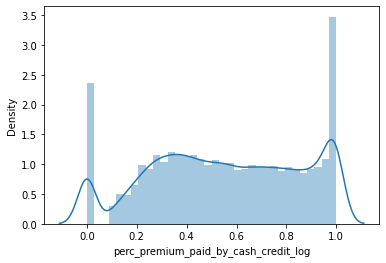

In [ ]:
test['perc_premium_paid_by_cash_credit_log'] = test['perc_premium_paid_by_cash_credit']**(1/3)
sns.distplot(test['perc_premium_paid_by_cash_credit_log'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


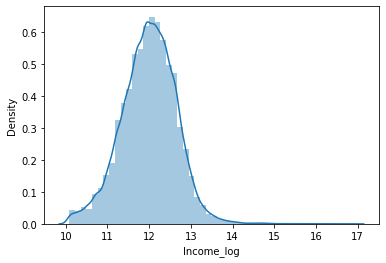

In [ ]:
test['Income_log'] = np.log(test['Income'])
sns.distplot(test['Income_log'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


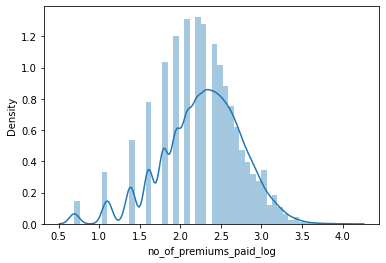

In [ ]:
test['no_of_premiums_paid_log'] = np.log(test['no_of_premiums_paid'])
sns.distplot(test['no_of_premiums_paid_log'])

In [ ]:
X_test = test.drop(["id", "perc_premium_paid_by_cash_credit", "residence_area_type", "sourcing_channel", "Income", "no_of_premiums_paid"], axis=1)

Predicting for the test cases

In [ ]:
probability = pd.DataFrame(xgb.predict_proba(X_test.values), columns=xgb.classes_)
test_prediction = round(probability[1], 1)

submission = pd.DataFrame()

submission["id"] = test["id"]

# # creating a count column and saving the predictions in it
submission['target'] = test_prediction

submission.to_csv('submission_final_4.csv', header=True, index=False)